In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [32]:
data = pd.read_csv('pybaseball_2022.csv')
data = data[data['hit_distance_sc'].notna()]

In [33]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed', "hc_x", "hc_y","pfx_x", "pfx_z", "release_speed", "events", "home_team", "pitch_type", "stand", "p_throws", "woba_value"]]

In [34]:
data = data[data['hc_x'].notna()]
data = data[data['hc_y'].notna()]
data = data[data['pfx_x'].notna()]
data = data[data['pfx_z'].notna()]
data = data[data['launch_angle'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['release_speed'].notna()]

In [35]:
data['launch_speed_percentile'] = data['launch_speed'].rank(pct=True)

In [36]:
# Top EV

Top_25_launch_speed_percentile = data.loc[data['launch_speed_percentile'] > 0.74]

Righty_Top_25_launch_speed_percentile = Top_25_launch_speed_percentile[Top_25_launch_speed_percentile['stand'].isin(["R"])]

In [37]:
events_renamed = {
    'home_run':'Home Run',
    'triple':'Triple', 
    'field_out' :'Field Out',
    'single':'Single',
    'double':'Double'
}

data['Events'] = data['events'].map(events_renamed)

pal = {
    
    'Home Run':'red',
    'Triple':'red', 
    'Field Out':'#2288b6',
    'Single':'yellow',
    'Double':'orange'
}

In [38]:
Righty_Top_25_launch_speed_percentile

,hit_distance_sc,launch_angle,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,events,home_team,pitch_type,stand,p_throws,woba_value,launch_speed_percentile
89,16.0,-9.0,100.7,100.03,166.19,-1.24,0.95,98.7,force_out,HOU,SI,R,R,0.00,0.797287
205,44.0,-1.0,103.2,103.05,151.06,1.27,-1.02,79.5,field_out,HOU,KC,R,R,0.00,0.871256
227,244.0,13.0,109.5,57.58,127.76,0.40,-0.66,82.0,double,HOU,CU,R,R,1.25,0.982939
237,272.0,14.0,100.2,103.56,75.50,-0.72,1.58,94.8,single,HOU,FF,R,R,0.90,0.781720
267,299.0,17.0,104.4,224.58,103.12,-1.55,1.01,95.6,double,HOU,SI,R,R,1.25,0.901998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740254,366.0,17.0,108.6,98.51,52.88,-1.18,0.68,93.9,double,MIA,SI,R,R,1.25,0.974606
740313,399.0,27.0,103.0,195.56,39.61,-1.35,-0.11,94.1,home_run,PIT,SI,R,R,2.00,0.866066
740342,227.0,15.0,100.7,54.43,113.51,0.44,-0.90,77.2,double,PIT,CU,R,R,1.25,0.797287
740394,389.0,28.0,107.8,20.23,81.34,1.21,0.96,93.0,home_run,PIT,FF,R,L,2.00,0.965265


# calibrate strike zone

In [39]:
Righty_Top_25_launch_speed_percentile_pitch_types = Righty_Top_25_launch_speed_percentile[Righty_Top_25_launch_speed_percentile['pitch_type'].isin(["FF", "CU"])]

Text(0.5, 1.0, "75th Percentile EV, pfx catcher's view")

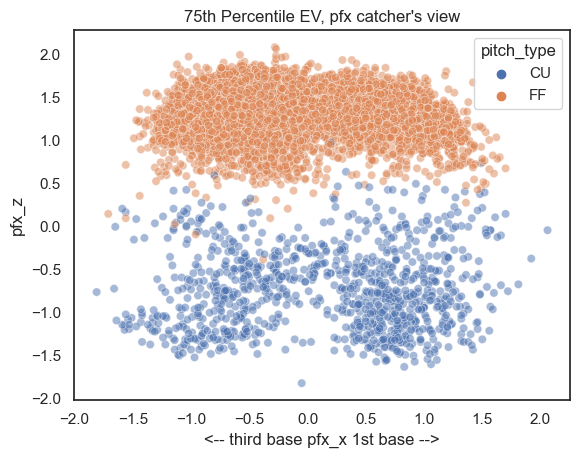

In [40]:
sns.set_theme(style="white")

chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile_pitch_types, 
                        x=Righty_Top_25_launch_speed_percentile_pitch_types.pfx_x, 
                        y=Righty_Top_25_launch_speed_percentile_pitch_types.pfx_z,  
                        hue = Righty_Top_25_launch_speed_percentile_pitch_types.pitch_type, 
                        alpha = 0.5)

#chart.invert_yaxis()


chart.set(xlabel='<-- third base pfx_x 1st base -->')
chart.set(ylabel='pfx_z')
plt.title("75th Percentile EV, pfx catcher's view")

In [41]:
#Righty_Top_25_launch_speed_percentile['zone_loc'] = ''

In [42]:
def my_function(row):
    if ((row['pfx_x'] < 0) and (row['pfx_z'] > 0)):
        return 'Inside_Up'
    elif ((row['pfx_x'] < 0) and (row['pfx_z'] < 0)):
        return 'Inside_down'
    elif ((row['pfx_x'] > 0) and (row['pfx_z'] < 0)):
        return 'away_down'
    else:
        return 'away_up'

In [43]:
Righty_Top_25_launch_speed_percentile['zone_loc'] = Righty_Top_25_launch_speed_percentile.apply(my_function, axis=1)


In [80]:
def my_function_up_down(row):
    if row['pfx_z'] > 0:
        return 'Up'
    else:
        return 'Down'


In [81]:
Righty_Top_25_launch_speed_percentile['zone_up_down'] = Righty_Top_25_launch_speed_percentile.apply(my_function_up_down, axis=1)


Text(0.5, 1.0, "75th Percentile EV, pfx catcher's view")

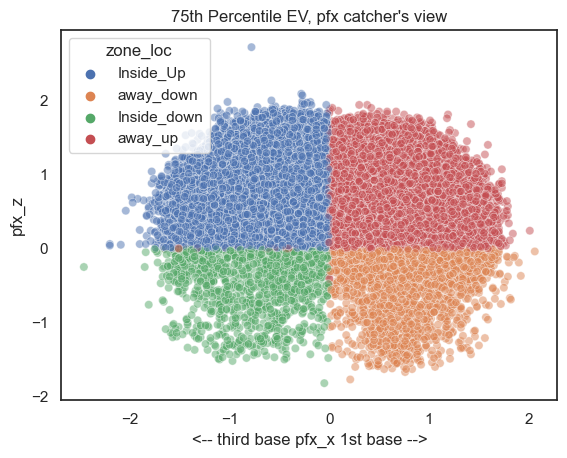

In [44]:
sns.set_theme(style="white")

chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile, 
                        x=Righty_Top_25_launch_speed_percentile.pfx_x, 
                        y=Righty_Top_25_launch_speed_percentile.pfx_z,  
                        hue = Righty_Top_25_launch_speed_percentile.zone_loc, 
                        alpha = 0.5)

#chart.invert_yaxis()


chart.set(xlabel='<-- third base pfx_x 1st base -->')
chart.set(ylabel='pfx_z')
plt.title("75th Percentile EV, pfx catcher's view")

## lower just have higher pitch count?

# above look at called strikes

Text(0.5, 1.0, '80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away')

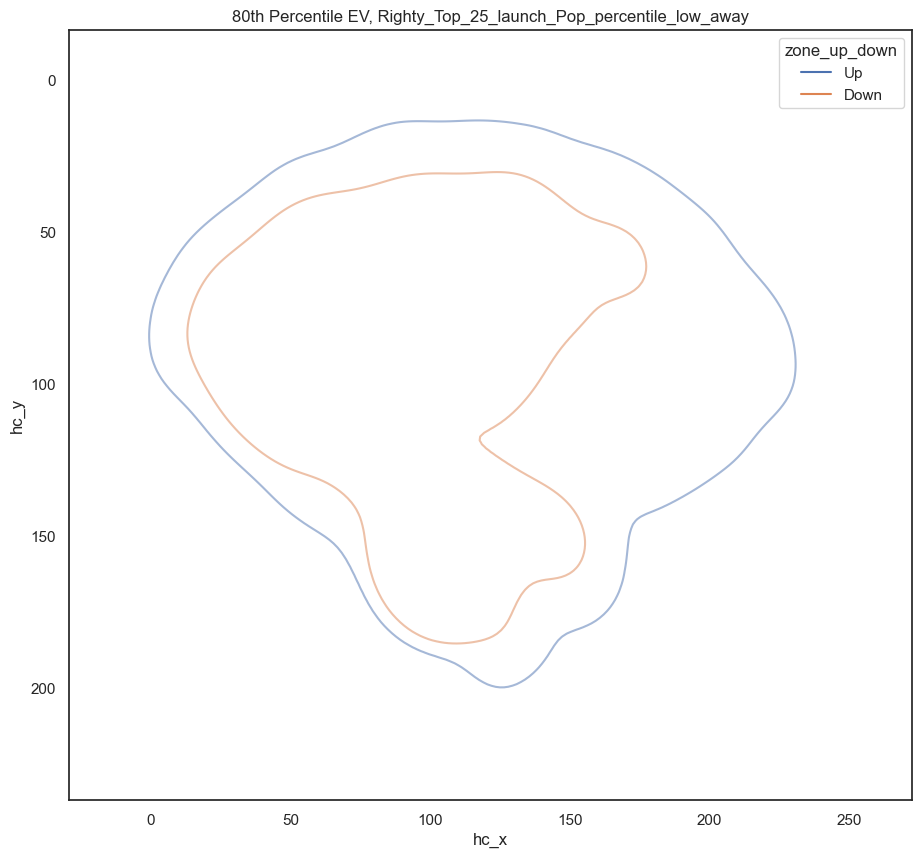

In [83]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.kdeplot(data = Righty_Top_25_launch_speed_percentile, 
                        x=Righty_Top_25_launch_speed_percentile.hc_x, 
                        y=Righty_Top_25_launch_speed_percentile.hc_y,  
                        hue = Righty_Top_25_launch_speed_percentile.zone_up_down, 
                        alpha = 0.5,
                        levels=2)

chart.invert_yaxis()


chart.set(xlabel='hc_x')
chart.set(ylabel='hc_y')
plt.title("80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away")

In [46]:
Righty_Top_25_launch_speed_percentile_hrs = Righty_Top_25_launch_speed_percentile[Righty_Top_25_launch_speed_percentile['events'].isin(["home_run"])]

Text(0.5, 1.0, '80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away')

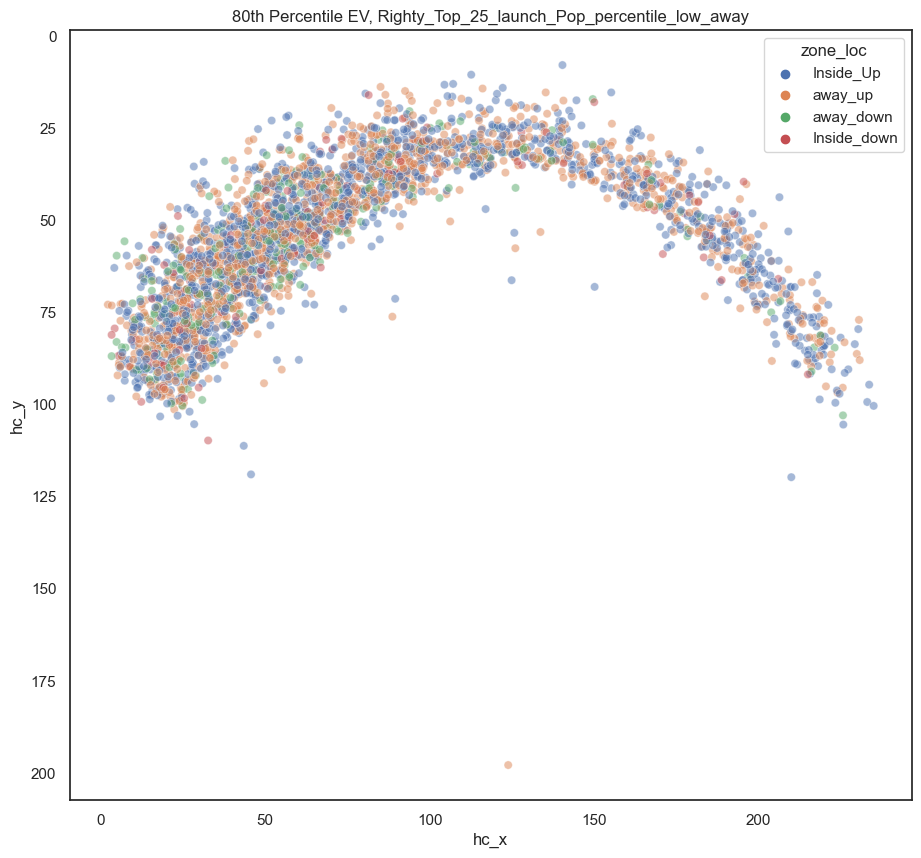

In [47]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(142)
chart = sns.scatterplot(data = Righty_Top_25_launch_speed_percentile_hrs, 
                        x=Righty_Top_25_launch_speed_percentile_hrs.hc_x, 
                        y=Righty_Top_25_launch_speed_percentile_hrs.hc_y,  
                        hue = Righty_Top_25_launch_speed_percentile_hrs.zone_loc, 
                        alpha = 0.5)
                        #levels=3)

chart.invert_yaxis()


chart.set(xlabel='hc_x')
chart.set(ylabel='hc_y')
plt.title("80th Percentile EV, Righty_Top_25_launch_Pop_percentile_low_away")

<Axes: xlabel='hc_y', ylabel='Density'>

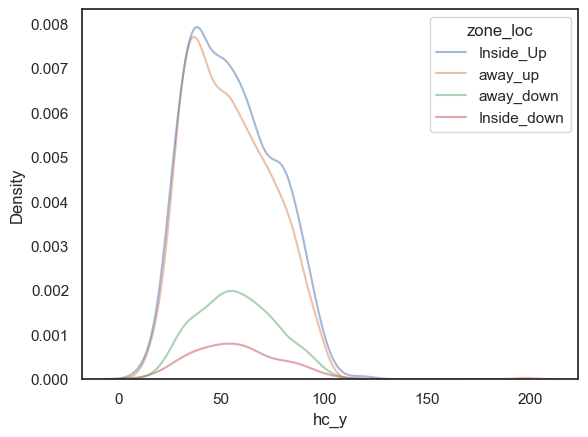

In [86]:
sns.kdeplot(data = Righty_Top_25_launch_speed_percentile_hrs, 
                x=Righty_Top_25_launch_speed_percentile_hrs.hc_y, 
                hue = Righty_Top_25_launch_speed_percentile_hrs.zone_loc, 
                alpha = 0.5)
                #levels=3)

# maybe compare up and down first

In [76]:
test2 = Righty_Top_25_launch_speed_percentile.groupby(['zone_loc','launch_angle'])['launch_speed'].quantile(0.75).to_frame()
test2

launch_speed
zone_loc  launch_angle              
Inside_Up -47.0              101.700
          -45.0              103.000
          -43.0              103.925
          -41.0              100.450
          -40.0              102.575
...                              ...
away_up    63.0              100.100
           64.0              100.200
           65.0              102.700
           66.0               99.050
           69.0               98.900

[396 rows x 1 columns]

In [77]:
test2 = test2.rename_axis(['zone_loc','launch_angle']).reset_index()
test2

,zone_loc,launch_angle,launch_speed
0,Inside_Up,-47.0,101.700
1,Inside_Up,-45.0,103.000
2,Inside_Up,-43.0,103.925
3,Inside_Up,-41.0,100.450
4,Inside_Up,-40.0,102.575
...,...,...,...
391,away_up,63.0,100.100
392,away_up,64.0,100.200
393,away_up,65.0,102.700
394,away_up,66.0,99.050


In [78]:
test2 = test2.loc[test2['launch_angle'] > 15]

test2 = test2.loc[test2['launch_angle'] < 50]

test2

,zone_loc,launch_angle,launch_speed
59,Inside_Up,16.0,107.775
60,Inside_Up,17.0,107.100
61,Inside_Up,18.0,106.900
62,Inside_Up,19.0,106.600
63,Inside_Up,20.0,106.550
...,...,...,...
375,away_up,45.0,102.600
376,away_up,46.0,103.625
377,away_up,47.0,101.575
378,away_up,48.0,103.100


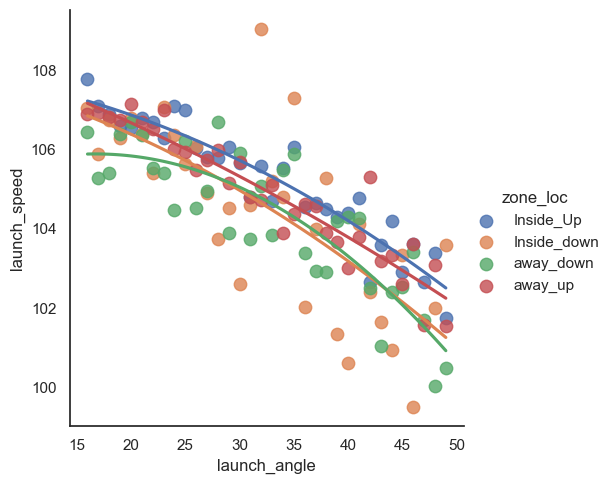

In [79]:
sns.lmplot(data = test2, 
                x="launch_angle", 
                y="launch_speed",  
                hue = "zone_loc", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

In [66]:
perticle_of_each_la_test = Righty_Top_25_launch_speed_percentile.groupby('launch_angle').quantile(.80)


/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_7930/2230243032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perticle_of_each_la_test = Righty_Top_25_launch_speed_percentile.groupby('launch_angle').quantile(.80)


In [67]:
perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile
launch_angle,,,,,,,,,
-47.0,2.0,101.70,115.170,178.090,-1.180,0.610,94.80,0.9,0.828401
-45.0,1.8,102.96,109.956,155.666,0.732,0.904,93.06,0.0,0.864979
-43.0,1.8,103.98,106.126,171.180,-0.380,0.772,96.14,0.0,0.891244
-42.0,3.0,103.10,105.970,150.570,1.470,0.230,87.00,0.0,0.868773
-41.0,2.6,100.40,123.704,164.430,0.208,0.752,95.06,0.0,0.787951
...,...,...,...,...,...,...,...,...,...
64.0,169.0,100.08,131.806,140.218,0.408,1.406,92.28,0.0,0.777926
65.0,175.4,103.18,128.412,158.554,-0.158,1.426,95.88,0.0,0.870431
66.0,175.0,100.28,142.230,169.874,0.454,1.302,94.82,0.0,0.783415


In [68]:
perticle_of_each_la_test['launch_angle'] = perticle_of_each_la_test.index
perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile,launch_angle
launch_angle,,,,,,,,,,
-47.0,2.0,101.70,115.170,178.090,-1.180,0.610,94.80,0.9,0.828401,-47.0
-45.0,1.8,102.96,109.956,155.666,0.732,0.904,93.06,0.0,0.864979,-45.0
-43.0,1.8,103.98,106.126,171.180,-0.380,0.772,96.14,0.0,0.891244,-43.0
-42.0,3.0,103.10,105.970,150.570,1.470,0.230,87.00,0.0,0.868773,-42.0
-41.0,2.6,100.40,123.704,164.430,0.208,0.752,95.06,0.0,0.787951,-41.0
...,...,...,...,...,...,...,...,...,...,...
64.0,169.0,100.08,131.806,140.218,0.408,1.406,92.28,0.0,0.777926,64.0
65.0,175.4,103.18,128.412,158.554,-0.158,1.426,95.88,0.0,0.870431,65.0
66.0,175.0,100.28,142.230,169.874,0.454,1.302,94.82,0.0,0.783415,66.0


In [69]:
perticle_of_each_la_test = perticle_of_each_la_test.loc[perticle_of_each_la_test['launch_angle'] > 15]

perticle_of_each_la_test = perticle_of_each_la_test.loc[perticle_of_each_la_test['launch_angle'] < 50]

perticle_of_each_la_test

,hit_distance_sc,launch_speed,hc_x,hc_y,pfx_x,pfx_z,release_speed,woba_value,launch_speed_percentile,launch_angle
launch_angle,,,,,,,,,,
16.0,342.0,108.00,154.120,98.778,0.800,1.340,94.10,1.25,0.967984,16.0
17.0,351.2,107.60,165.646,92.908,0.812,1.390,94.42,1.25,0.962597,17.0
18.0,362.6,107.30,156.590,93.064,0.970,1.380,94.40,1.25,0.958156,18.0
19.0,374.0,107.50,163.270,88.170,0.730,1.330,94.60,1.25,0.961185,19.0
20.0,384.8,107.50,167.338,83.992,0.760,1.370,94.28,1.25,0.961185,20.0
21.0,393.0,107.20,168.230,83.518,0.878,1.380,94.48,2.00,0.956619,21.0
22.0,400.0,107.30,161.674,79.310,0.932,1.340,93.90,2.00,0.958156,22.0
23.0,407.0,107.10,166.402,75.412,0.890,1.340,94.10,2.00,0.955069,23.0
24.0,411.0,107.30,164.474,74.724,0.944,1.320,93.92,2.00,0.958156,24.0


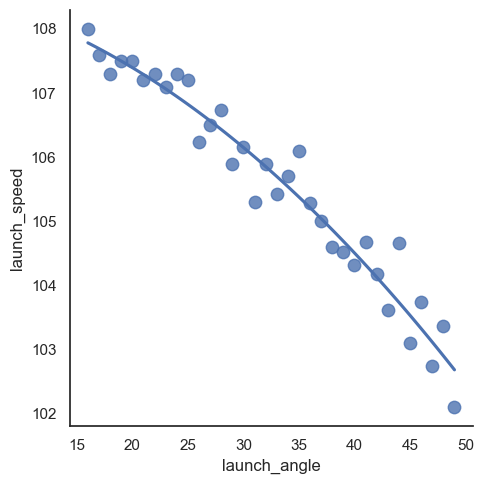

In [70]:
sns.lmplot(data = perticle_of_each_la_test, 
                x="launch_angle", 
                y="launch_speed",  
                # hue = "zone", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

# save inside and away for pull%

In [19]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = Righty_Top_25_launch_speed_percentile.groupby(["zone_loc","launch_angle"])["hit_distance_sc", "launch_angle", "launch_speed","zone_loc"].mean()

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_7930/1300495662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_la_ev_Righty_Top_25_launch_speed_percentile = Righty_Top_25_launch_speed_percentile.groupby(["zone_loc","launch_angle"])["hit_distance_sc", "launch_angle", "launch_speed","zone_loc"].mean()
/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_7930/1300495662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_la_ev_Righty_Top_25_launch_speed_percentile = Righty_Top_25_launch_speed_percentile.groupby(["zone_loc","launch_angle"])["hit_distance_sc", "launch_angle", "launch_speed","zone_loc"].mean()


In [21]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.loc[gb_la_ev_Righty_Top_25_launch_speed_percentile['launch_angle'] < 60]

gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.loc[gb_la_ev_Righty_Top_25_launch_speed_percentile['launch_angle'] > 0]


In [22]:
gb_la_ev_Righty_Top_25_launch_speed_percentile

hit_distance_sc  launch_angle  launch_speed
zone_loc  launch_angle                                             
Inside_Up 1.0                 61.881890           1.0    104.429134
          2.0                 71.717514           2.0    104.590395
          3.0                 84.988889           3.0    104.668333
          4.0                 98.937853           4.0    104.295480
          5.0                114.952381           5.0    104.770370
...                                 ...           ...           ...
away_up   55.0               248.400000          55.0    101.140000
          56.0               254.000000          56.0    105.200000
          57.0               238.500000          57.0    101.825000
          58.0               269.000000          58.0    103.800000
          59.0               220.000000          59.0    101.100000

[223 rows x 3 columns]

In [23]:
gb_la_ev_Righty_Top_25_launch_speed_percentile = gb_la_ev_Righty_Top_25_launch_speed_percentile.rename_axis(['pitch_zone','launch_angle']).reset_index()

In [24]:
gb_la_ev_Righty_Top_25_launch_speed_percentile

,zone,lanchf,hit_distance_sc,launch_angle,launch_speed
0,Inside_Up,1.0,61.881890,1.0,104.429134
1,Inside_Up,2.0,71.717514,2.0,104.590395
2,Inside_Up,3.0,84.988889,3.0,104.668333
3,Inside_Up,4.0,98.937853,4.0,104.295480
4,Inside_Up,5.0,114.952381,5.0,104.770370
...,...,...,...,...,...
218,away_up,55.0,248.400000,55.0,101.140000
219,away_up,56.0,254.000000,56.0,105.200000
220,away_up,57.0,238.500000,57.0,101.825000
221,away_up,58.0,269.000000,58.0,103.800000


<Axes: xlabel='lanchf', ylabel='launch_speed'>

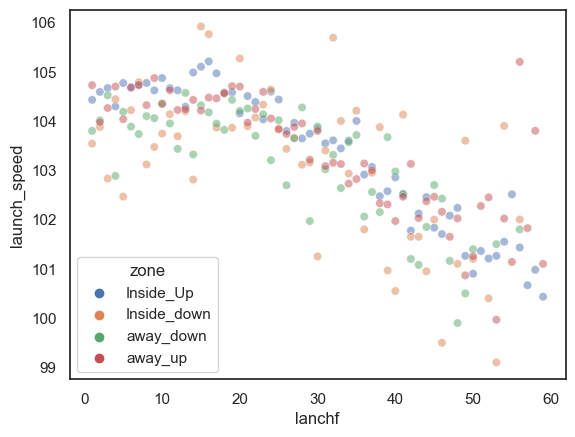

In [25]:
sns.scatterplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)

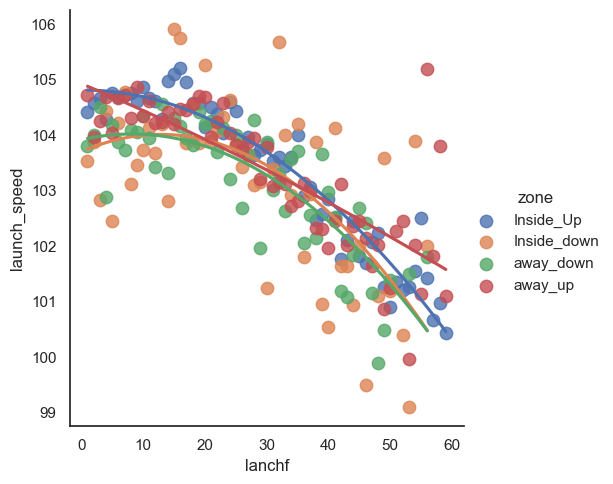

In [28]:
sns.lmplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x="lanchf", 
                y="launch_speed",  
                hue = "zone", 
                order=2,
                ci=None,
                scatter_kws={"s":80})

<Axes: xlabel='lanchf', ylabel='launch_speed'>

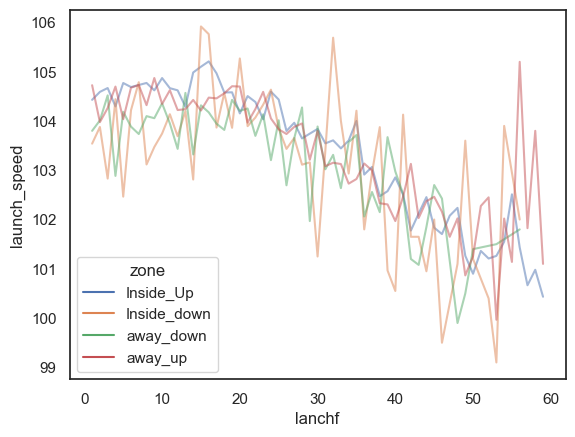

In [29]:
sns.lineplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)

<Axes: xlabel='lanchf', ylabel='launch_speed'>

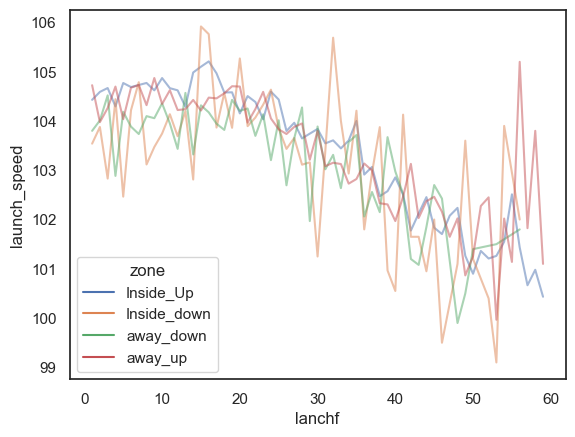

In [30]:
sns.lineplot(data = gb_la_ev_Righty_Top_25_launch_speed_percentile, 
                x=gb_la_ev_Righty_Top_25_launch_speed_percentile.lanchf, 
                y=gb_la_ev_Righty_Top_25_launch_speed_percentile.launch_speed,  
                hue = gb_la_ev_Righty_Top_25_launch_speed_percentile.zone, 
                alpha = 0.5)